In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.rcParams["figure.figsize"] = (8,6)

In [3]:
canvas_size=(300,300)

### Data

In [4]:
folder='../data/red'

image=np.load(folder+'/image_7.npy')
label=np.load(folder+'/values_7.npy')

In [5]:
def plot(X,Y):
    plt.imshow(X)
    p=2*max(canvas_size)/100
    plt.scatter([Y[1]+p,Y[0]-p,Y[1]+p,Y[0]-p],\
                [Y[2]-p,Y[2]-p,Y[3]+p,Y[3]+p],c='red')
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((Y[0]-p,Y[2]-p),Y[1]-Y[0]+2*p,Y[3]-Y[2]+2*p,linewidth=2,edgecolor='r',facecolor='none'))
    return plt

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

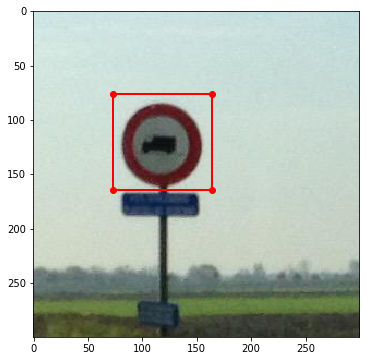

In [6]:
plot(image,label)

### Data augmentation

In [7]:
def flip_image(image,label):
    im= np.fliplr(image)
    l=[300-label[1] ,300-label[0],label[2],label[3]]
    return im,l
def rotate_image(image,label):
    im= np.rot90(image)
    l=[label[2] ,label[3],300-label[1],300-label[0]]
    return im,l

In [8]:
def flip_and_rotate(image,label,flip=True):
    #if flip=False, then only return a list of the 4 rotated images
    #if flip=True, then return 8 images (rotations+flips)
    output_images=[]
    output_labels=[]
    for k in range(4):
        output_images+=[image]
        output_labels+=[label]
        image,label=rotate_image(image,label)
    if flip:
        image,label=flip_image(image,label)
        for k in range(4):
            output_images+=[image]
            output_labels+=[label]
            image,label=rotate_image(image,label)
    return output_images,output_labels

In [9]:
ims,labels=flip_and_rotate(image,label)

In [10]:
len(ims)

8

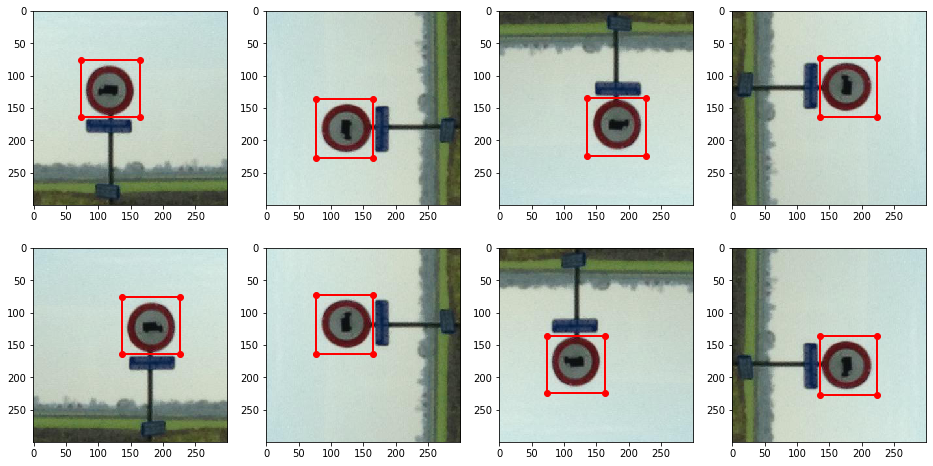

In [11]:
plt.figure(figsize=(16,8))
for i in range(8):
    ax= plt.subplot(2,4,i+1)
    im=plot(ims[i],labels[i])
    #plt.title(i)